## Exploring Tabular Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataframe files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# check training size
print('Training size : {}'.format(train_df.shape))
print('Testing size : {}'.format(test_df.shape))

Training size : (33126, 8)
Testing size : (10982, 5)


In [3]:
train_df.sample(5)  # check 5 random samples of training data

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
30760,ISIC_9296537,IP_5772279,male,70.0,lower extremity,unknown,benign,0
13548,ISIC_4158721,IP_2235340,female,55.0,torso,nevus,benign,0
27943,ISIC_8455915,IP_9232483,female,45.0,torso,unknown,benign,0
14892,ISIC_4555795,IP_0775515,male,45.0,upper extremity,unknown,benign,0
4508,ISIC_1457687,IP_0512752,male,30.0,upper extremity,unknown,benign,0


The testing data is only about 1/3 of the training data. Looking at the columns, we can see that our output is the target column. Let's have a peek of it's values

In [4]:
print("unique values in column 'target': {}".format(list(train_df['target'].unique())))
target_dis = list(train_df['target'].value_counts())
benign_per = target_dis[0]/sum(target_dis)
print("target count distribution: {}".format(target_dis))
print("benign percentage: {:.2f}%".format(benign_per*100))

unique values in column 'target': [0, 1]
target count distribution: [32542, 584]
benign percentage: 98.24%


### Target feature
The values are binary, `0` for `benign`, and `1` must be for `melanoma`. We can conclude that we need to predict and classify a patient's image into malignant or benign. This makes it a **binary classification** task

But wait. See the count distribution of the target? 32k for benign and only 584 for melanoma. That is highly imbalance! If the model predicts `0` for every observation in the training set, it will easily get 98% accuracy. We need to address this imbalance before feeding the data to the model, more on that later

In [5]:
test_df.head(5)  # check first 5 rows of testing data

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


### What are our input features?
Looking at the testing set, we only have 5 columns of metadata to help in predictions. It's important we don't include features not presented in both dataset or the model will produce an error when trying to predict the test set.

Seems like we have a missing value (`NaN`) in the first row of the test set. Let's see if other columns have them

In [6]:
train_df.isnull().sum()  # count any NaN values in the training set

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [7]:
test_df.isnull().sum()  # count any NaN values in the testing set

image_name                         0
patient_id                         0
sex                                0
age_approx                         0
anatom_site_general_challenge    351
dtype: int64

### Visualizing the features

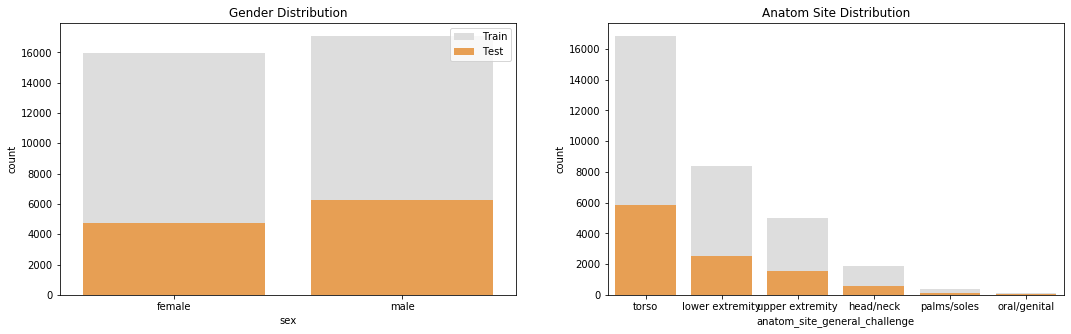

In [8]:
# create a figure object, with subplots of 1 row and 2 cols
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# 1st subplot is the gender data
ax1.set_title('Gender Distribution')
sns.countplot(train_df.sex.sort_values(ignore_index=True),
              ax=ax1,
              color='#dddddd',
              label='Train')
sns.countplot(test_df.sex.sort_values(ignore_index=True),
              ax=ax1,
              color='#ff9f3c',
              label='Test')
ax1.legend()

# 2nd subplot the lesion location data
ax2.set_title('Anatom Site Distribution')
sns.countplot(train_df.anatom_site_general_challenge,
              ax=ax2,
              color='#dddddd',
              label='Train',
              order=train_df['anatom_site_general_challenge'].value_counts().index)
sns.countplot(test_df.anatom_site_general_challenge,
              ax=ax2,
              color='#ff9f3c',
              label='Test',
              order=test_df['anatom_site_general_challenge'].value_counts().index)
ax1.legend()
plt.show()

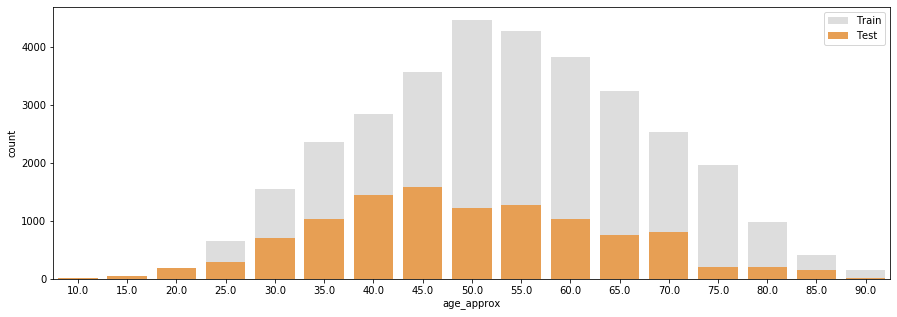

In [13]:
# 3rd distribution of age
fig = plt.figure(figsize=(15,5))
# fig.set_title('Gender Distribution')
sns.countplot(train_df.age_approx.sort_values(ignore_index=True),
              color='#dddddd',
              label='Train')
sns.countplot(test_df.age_approx.sort_values(ignore_index=True),
              color='#ff9f3c',
              label='Test')
plt.legend()
plt.show()